
# CLASSIFICATION USING K-NEAREST NEIGHBORS




DATA SOURCE: https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html

# STEP#0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP#1: IMPORT DATASET

In [2]:
Tshirt = pd.read_csv("Tshirt_Sizing_Dataset.csv")

In [3]:
Tshirt

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


# STEP#2: CREATE TESTING AND TRAINING DATASET

In [4]:
X = Tshirt.iloc[:, 0:2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [5]:
y = Tshirt.iloc[:, 2].values
y
#categorical variable --> ordinal

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#3: MODEL TRAINING

In [10]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
X_test

array([[163,  61],
       [163,  64],
       [160,  64],
       [165,  61],
       [160,  60]])

# STEP#4: MODEL TESTING

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred


array([0, 0, 1, 0, 1])

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

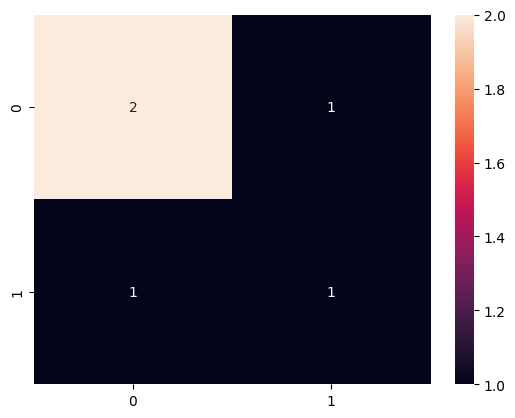

In [14]:
sns.heatmap(cm, annot=True, fmt="d")

# STEP#5: TESTING RESULTS VISUALIZATION

# VISUALIZE TRAINING SET RESULTS

<ipython-input-15-d1dad9cf998c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


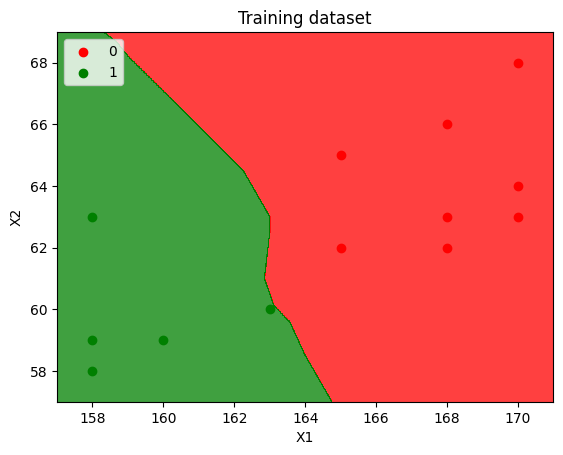

In [15]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# VISUALIZE TEST SET RESULTS

<ipython-input-16-6e73f93136a0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


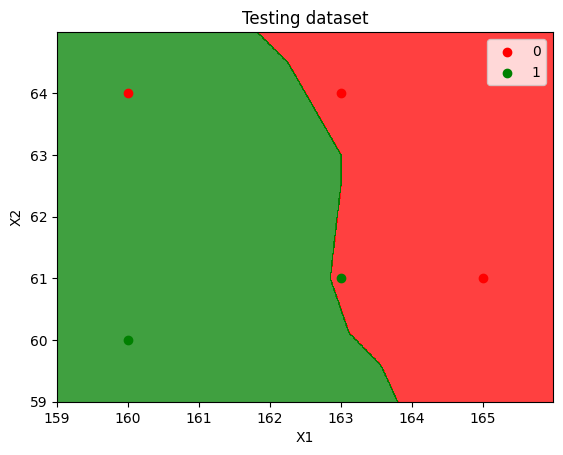

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [17]:
import joblib

In [18]:
joblib.dump(classifier, "model_KNN.pkl")

['model_KNN.pkl']

In [19]:
my_model = joblib.load("model_KNN.pkl")

In [20]:
from google.colab import files

# Assuming your file is saved in the current working directory
files.download("model_KNN.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>